In [1]:
# add modules folder to Python's search path
from os import times
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
print(script_dir)

C:\Users\pinak\Documents\GitHub\NMA
C:\Users\pinak\Documents\GitHub\NMA\experiments\task


In [9]:
# import remaining modules
import task
import methods
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# set up conditions and collect list
db_path = '../../data/hcp_task'
group = task.Group(db_path)
conditions_0 = ['0bk_body', '0bk_faces', '0bk_places', '0bk_tools']
conditions_2 = ['2bk_body', '2bk_faces', '2bk_places', '2bk_tools']
X_0, Y_0 = group.extract_cons(conditions_0, remove_mean=True)
#X_0 = group.squash_frames(X_0)
X_0, Y_0 = group.transpose(X_0)

Time taken by extract_con is 1.29703688621521 seconds
Time taken by extract_con is 1.2865536212921143 seconds
Time taken by extract_con is 1.3200416564941406 seconds
Time taken by extract_con is 1.4025912284851074 seconds
Time taken by extract_cons is 5.470280408859253 seconds
Time taken by transpose is 0.29647159576416016 seconds


In [10]:
from sklearn.decomposition import PCA
print(X_0.shape)
X_0 = PCA(n_components=20).fit_transform(X_0.reshape(X_0.shape[0], -1))
print(X_0.shape, Y_0.shape)

(1440, 339, 78)
(1440, 20) (1440,)


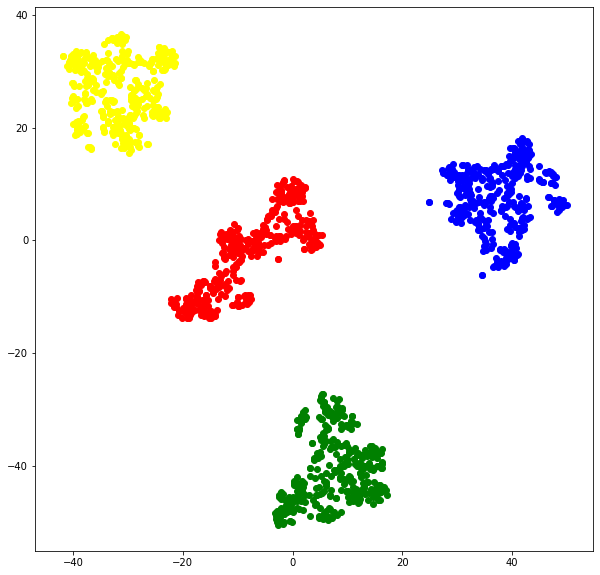

In [11]:
n_subjects = int(X_0.shape[0] / 4)
tsne = TSNE(n_components=2, perplexity=50)
X = tsne.fit_transform(X_0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green', 'yellow']
for i in range(4):
    idx = list(range(i*n_subjects, (i+1)*n_subjects))
    x = X[idx]
    ax.scatter(x[:, 0], x[:, 1], c=colors[i])
plt.show()

In [ ]:
print(X_0[:3, :5])

In [ ]:
print(X_0[339: 342,:5])

In [ ]:
subject = task.Individual(db_path, 0)

In [ ]:
subject.load_evs_con('0bk_places')

In [ ]:
group = task.Group(db_path)
X = group.extract_cons(conditions_0)

In [ ]:
X[0][339+339, :, :]

In [ ]:
X_0[0, :]

In [ ]:
X_0[1, :]

In [ ]:
X_0[361, :]